In [1]:
import numpy as np
import matplotlib
#matplotlib.use('WebAgg')
#matplotlib.use('Qt4Cairo')
#matplotlib.use('Qt5Cairo')
matplotlib.use('nbAgg')
import matplotlib.pyplot as plt

In [2]:
def rr():
    
        
    _a= [np.random.multivariate_normal([-5,5],[[0.12,0],[0,0.12]]),\
         np.random.multivariate_normal([-6,0.1],[[0.12,0],[0,1]]),\
         np.random.multivariate_normal([10,-4],[[0.1,0],[0,0.12]]),\
         np.random.multivariate_normal([0,0],[[0.1,0],[0,0.1]]),\
         np.random.multivariate_normal([10,-40],[[0.1,0],[0,0.12]]),\
        np.random.multivariate_normal([0,10],[[0.1,0],[0,2]])]
    
    _i=np.random.choice(np.arange(len(_a)))
    
    return _a[_i]


data=np.array([ rr() for i in np.arange(300)])

In [3]:
if not True:
    plt.scatter([c[0] for c in data],[c[1] for c in data])#plot the centroids
    plt.show()

In [4]:
def dist(r1,r2):
    return np.sqrt( (r1[0]-r2[0])**2 + (r1[1]-r2[1])**2 )


def cluster_avg(centers):
    return [np.mean([i[0] for i in centers]),np.mean([i[1] for i in centers])]
    
def dist_to_closest(data,centers):

    for i,c in enumerate(centers):
        _tmp=dist(data,c)
        if i==0:
            arg_min=i
            min_dist=_tmp
        
        if _tmp<min_dist:
            arg_min=i
            min_dist=_tmp
            
        if _tmp==min_dist:

            arg_min=np.random.choice([i,arg_min])
            min_dist=np.random.choice([_tmp,min_dist])
    return arg_min, min_dist

<IPython.core.display.Javascript object>


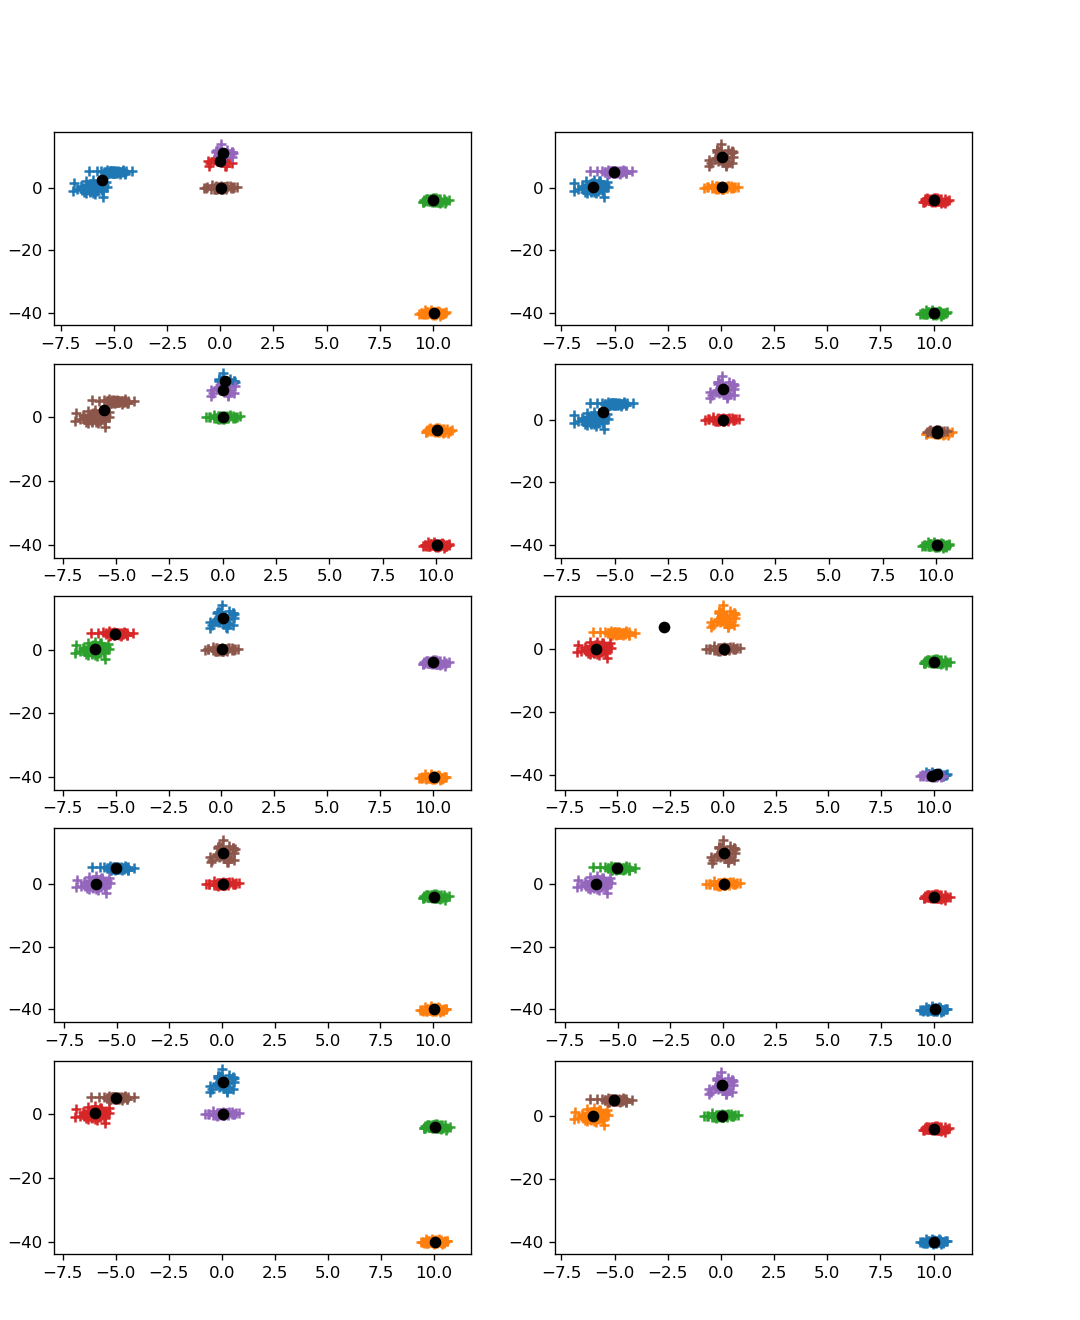

In [5]:
fig=plt.figure(figsize=(9,11))
fig.subplots_adjust(bottom=0.05, left=0.05, top = 0.9, right=0.9)
#=============================================================================#


_k=6
ldata=len(data)


#run it multiple times
runs=10
for run in range(runs):

    #==========initialize the centers (k++ init)==========#
    init_index=np.random.randint(ldata)#choose a point at random as one cluster center
    centers=[  ]
    centers.append(data[init_index])

    for i in np.arange(_k-1):

        dists=np.array([])
        for j,d in enumerate(data):#find the distances for each point to the closest center
            dists=np.append(dists, dist_to_closest(d,centers)[1])

        probs=dists/np.sum(dists)#normalize dists, so that they represent probabilities

        rand_index=np.nonzero(np.random.multinomial(1,probs))[0][0]
        centers.append(data[rand_index])

    #==========run k-means==========#
    _iter=0
    while _iter<=50:#run k-means
        clusters=[[] for i in np.arange(_k)] 
        for i in np.arange(ldata):
            #calculate distances
            _tmp= np.array( [dist( centers[c] , data[i] ) for c in np.arange( _k ) ] ) 
            #find the index of the closest centroid
            _min=_tmp.argmin() 
            #make clusters
            clusters[_min].append( data[i] )

        for i in np.arange(_k):
            _tmp=cluster_avg(clusters[i])
            centers[i]=[_tmp[0],_tmp[1]]


        _iter+=1
        
        
    
    
    sub = fig.add_subplot(runs/2, 2, run+1)
    for i in np.arange(_k):
        sub.scatter([c[0] for c in clusters[i]],[c[1] for c in clusters[i]],marker='+')#plot the data
    sub.scatter([c[0] for c in centers],[c[1] for c in centers],marker='o',color='black')#plot the centroids



plt.show()